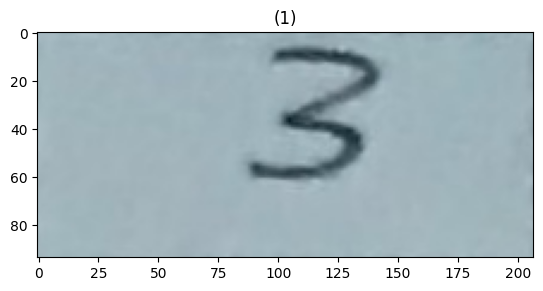

(94, 207, 3)
3
3


In [8]:
from skimage.feature import hog
from sklearn.neighbors import KNeighborsClassifier
import joblib
from commonfunctions import *
import cv2

knn = joblib.load(".\models\knn_model_digits.pkl")
# extract the features from the image to predict
def feature_extraction(image):
    return hog(image, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2), transform_sqrt=True, block_norm='L2-Hys')


def predict(df):
    predict = knn.predict(df.reshape(1,-1))[0]
    predict_proba = knn.predict_proba(df.reshape(1,-1))
    return predict, predict_proba[0][predict]




# A function used to get the prediction of the digit from the image
# params: It takes only the image
def getPrediction(image):
  try:
    show_images([image])
    print(image.shape)
    print(len(image.shape))
    if len(image.shape)==3:
      image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (25, 25))
    # extract featuress
    hog = feature_extraction(image)
    # apply k-NN model created in previous
    predictions = predict(hog)
    return predictions[0]
  except cv2.error :
    return "x"
  except:
    return "x"

image = cv2.imread("./Cell_8_Test_10.jpg")
print(getPrediction(image))